In [17]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm, chi2, f, t

# Генерация нормального распределения Гаусса

In [18]:
n = 1000
m = 1 + int(np.log2(n))
rng = np.random.default_rng()

10.007132449292282 1.2907566099126782


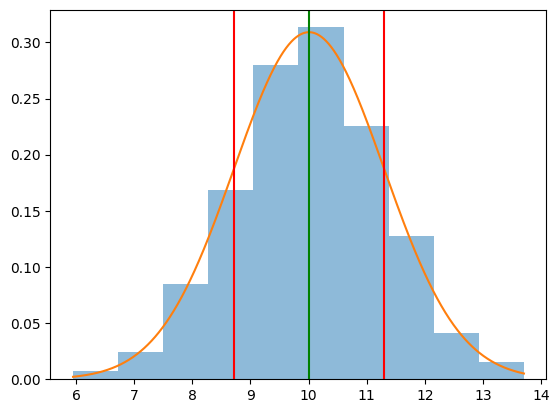

In [19]:
k = 20
# Создаём нормальную (выборку) распределенную случайную величину
norm_sample = np.array([sum(rng.uniform(low=0.0, high=1.0, size=k)) for _ in range(n)])

# Абсолютные частоты и концы отрезков
hist, edges = np.histogram(norm_sample, bins=m, range=(min(norm_sample) - 0.01, max(norm_sample) + 0.01))
hist_r, _ = np.histogram(norm_sample, bins=m, range=(min(norm_sample) - 0.01, max(norm_sample) + 0.01), density=True)

# Считаем точечные оценки
edges_mids = np.array([(edges[i] + edges[i+1]) / 2 for i in range(m)])
avr = np.average(edges_mids, weights=hist)
std = np.sqrt(np.average((edges_mids - avr) ** 2, weights=hist) * (n / (n-1)))
print(avr, std)

# Строим теоретическое распределние и полученное
x = np.linspace(edges[0], edges[-1], 1000)
plt.stairs(hist_r, edges, fill=True, alpha=0.5)
plt.plot(x, norm.pdf(x, loc=avr, scale=std))
plt.axvline(avr, 0, 1, color="green")
plt.axvline(avr - std, 0, 1, color="red")
plt.axvline(avr + std, 0, 1, color="red")
plt.show()

Значения критерия согласия Пирсона: 2.748250486413651
Критическое значение критерия: 14.067140449340169


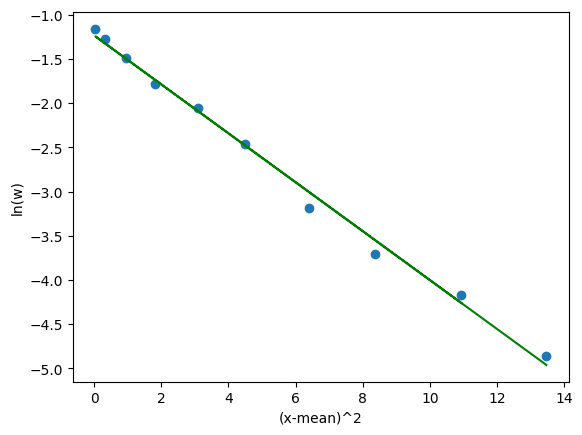

Коэффициент детерминации: 0.9942109994860175


In [20]:
# Критерий Пирсона

# Вычисления предполагаемых частот для каждого интервала
P = np.array([norm.cdf((edges[i+1] - avr) / std) - norm.cdf((edges[i] - avr) / std) for i in range(m)])
nP = n * P

# Вычисления сумму квадратов случайных величин
chi2_val = sum((hist - nP) ** 2 / nP)
print(f"Значения критерия согласия Пирсона: {chi2_val}")

# Вычисление критического значения для проверки
chi2_crit = chi2.ppf(0.95, m-3)
print(f"Критическое значение критерия: {chi2_crit}")

# Анамарфозы

# Получаем y
y = np.log(hist_r)

# Получаем x
x = (edges_mids - avr) ** 2

# Построение регрессии
reg = np.polynomial.Polynomial.fit(x, y, 1)

# Построение графика
plt.scatter(x, y)
plt.plot(x, reg(x), c="green")
plt.xlabel("(x-mean)^2")
plt.ylabel("ln(w)")
plt.show()

# Коэффициент детерминации
score = 1 - sum((y - reg(x)) ** 2) / sum((y - np.mean(y)) ** 2)
print(f"Коэффициент детерминации: {score}")

In [21]:
k_s = [1, 2, 5]

for k in k_s:
    norm_sample = np.array([sum(rng.uniform(low=0.0, high=1.0, size=k)) for _ in range(n)])
    hist, edges = np.histogram(norm_sample, bins=m, range=(min(norm_sample) - 0.01, max(norm_sample) + 0.01))
    edges_mids = np.array([(edges[i] + edges[i+1]) / 2 for i in range(m)])
    avr = np.average(edges_mids, weights=hist)
    std = np.sqrt(np.average((edges_mids - avr) ** 2, weights=hist) * (n / (n-1)))
    P = np.array([norm.cdf((edges[i+1] - avr) / std) - norm.cdf((edges[i] - avr) / std) for i in range(m)])
    nP = n * P
    chi2_val = sum((hist - nP) ** 2 / nP)
    print(f"Значения критерия согласия Пирсона для k={k}: {chi2_val}")


Значения критерия согласия Пирсона для k=1: 237.90250223213425
Значения критерия согласия Пирсона для k=2: 20.623983341819805
Значения критерия согласия Пирсона для k=5: 3.647527535636046


# Создание кси-квадрат распределения

3.0267354396069477 2.3089465894760255


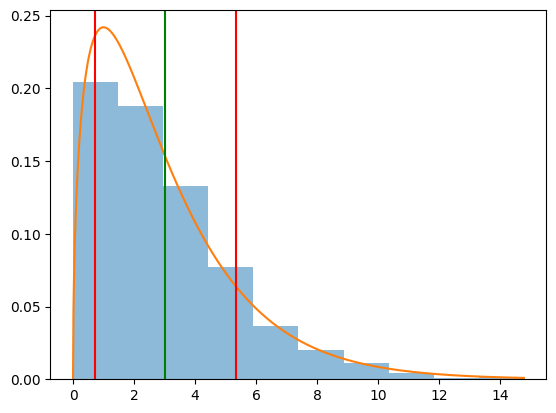

In [41]:
# Функция для создания нормальной случайной величины
def create_normal(sample_size):
    return np.array([sum(rng.uniform(low=0.0, high=1.0, size=25)) for _ in range(sample_size)])

k = 3
R = np.zeros(n)
for _ in range(k):
    L = create_normal(n)
    Z = (L - L.mean())/L.std()
    R += Z ** 2

# Абсолютные частоты и концы отрезков
hist, edges = np.histogram(R, bins=m, range=(min(R) - 0.01, max(R) + 0.01))
hist_r, _ = np.histogram(R, bins=m, range=(min(R) - 0.01, max(R) + 0.01), density=True)

# Считаем точечные оценки
edges_mids = np.array([(edges[i] + edges[i+1]) / 2 for i in range(m)])
avr = np.average(edges_mids, weights=hist)
std = np.sqrt(np.average((edges_mids - avr) ** 2, weights=hist) * (n / (n-1)))
print(avr, std)

# Строим теоретическое распределние и полученное
x = np.linspace(edges[0], edges[-1], 1000)
plt.stairs(hist_r, edges, fill=True, alpha=0.5)
plt.plot(x, chi2.pdf(x, df=k))
plt.axvline(avr, 0, 1, color="green")
plt.axvline(avr - std, 0, 1, color="red")
plt.axvline(avr + std, 0, 1, color="red")
plt.show()

Значения критерия согласия Пирсона: 7.65431674990602
Критическое значение критерия: 15.50731305586545


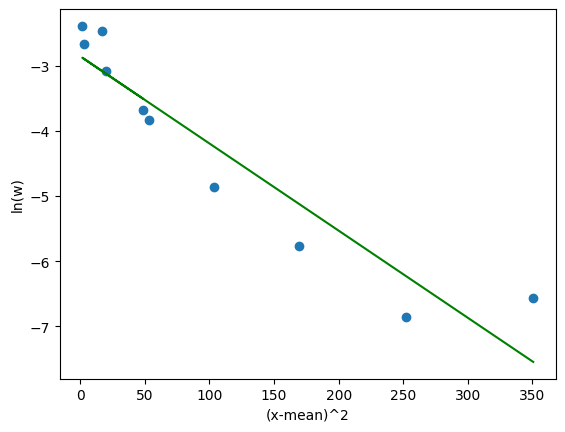

Коэффициент детерминации: 0.8875047495072936


In [23]:
# Проверка критерием Пирсона

# Вычисления предполагаемых частот для каждого интервала
P = np.array([chi2.cdf(edges[i+1], df=k) - chi2.cdf(edges[i], df=k) for i in range(m)])
nP = n * P

# Вычисления значения
chi2_val = sum((hist - nP) ** 2 / nP)
print(f"Значения критерия согласия Пирсона: {chi2_val}")

# Вычисление критического значения для проверки
chi2_crit = chi2.ppf(0.95, m-2)
print(f"Критическое значение критерия: {chi2_crit}")

# Анамарфозы

# Получаем y
y = np.log(hist_r)

# Получаем x
x = (edges_mids - avr) ** 2

# Построение регрессии
reg = np.polynomial.Polynomial.fit(x, y, 1)

# Построение графика
plt.scatter(x, y)
plt.plot(x, reg(x), c="green")
plt.xlabel("(x-mean)^2")
plt.ylabel("ln(w)")
plt.show()

# Коэффициент детерминации
score = 1 - sum((y - reg(x)) ** 2) / sum((y - np.mean(y)) ** 2)
print(f"Коэффициент детерминации: {score}")

# Создание распределения Фишера

1.1792912225420937 1.070667501721511


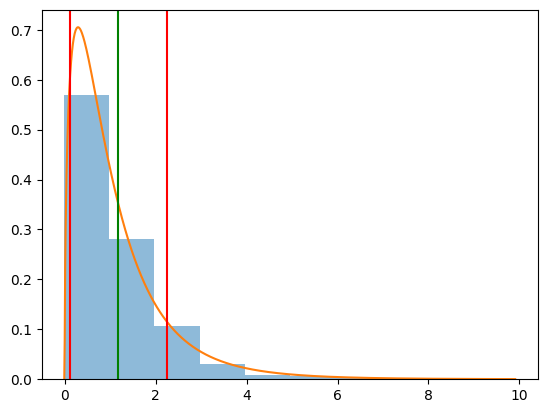

In [49]:
def create_chi2(sample_size, df):
    R = np.zeros(sample_size)
    for _ in range(df):
        L = create_normal(sample_size)
        Z = (L - L.mean())/L.std()
        R += Z ** 2
    return R

d1 = 3
d2 = 15

Y1 = create_chi2(n, d1)
Y2 = create_chi2(n, d2)

S = (Y1 / d1) / (Y2 / d2)

hist, edges = np.histogram(S, bins=m, range=(min(S) - 0.01, max(S) + 0.01))
hist_r, _ = np.histogram(S, bins=m, range=(min(S) - 0.01, max(S) + 0.01), density=True)

edges_mids = np.array([(edges[i] + edges[i+1]) / 2 for i in range(m)])
avr = np.average(edges_mids, weights=hist)
std = np.sqrt(np.average((edges_mids - avr) ** 2, weights=hist) * (n / (n-1)))
print(avr, std)

x = np.linspace(edges[0], edges[-1], 1000)
plt.stairs(hist_r, edges, fill=True, alpha=0.5)
plt.plot(x, f.pdf(x, d1, d2))
plt.axvline(avr, 0, 1, color="green")
plt.axvline(avr - std, 0, 1, color="red")
plt.axvline(avr + std, 0, 1, color="red")
plt.show()

In [25]:
# Проверка критерием Пирсона

# Вычисления предполагаемых частот для каждого интервала
P = np.array([f.cdf(edges[i+1], d1, d2) - f.cdf(edges[i], d1, d2) for i in range(m)])
nP = n * P

# Вычисления значения
chi2_val = sum((hist - nP) ** 2 / nP)
print(f"Значения критерия согласия Пирсона: {chi2_val}")

# Вычисление критического значения для проверки
chi2_crit = chi2.ppf(0.95, m-3)
print(f"Критическое значение критерия: {chi2_crit}")

Значения критерия согласия Пирсона: 18.29164814708412
Критическое значение критерия: 14.067140449340169


# Создание t-распределения

0.018934865259597707 1.1963113159610719


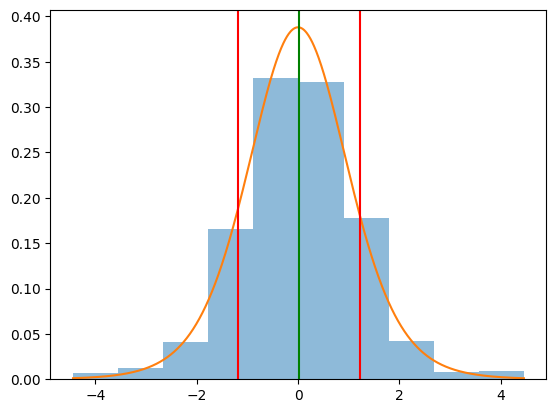

In [26]:
def create_standart_norm(sample_size):
    norm = create_normal(sample_size)
    return (norm - norm.mean()) / norm.std()

k = 9
Y0 = create_standart_norm(n)
sqr_sum = np.zeros(n)
for _ in range(k):
    Yi = create_standart_norm(n)
    sqr_sum += Yi ** 2
T = Y0 / np.sqrt(sqr_sum / k)

hist, edges = np.histogram(T, bins=m, range=(min(T) - 0.01, max(T) + 0.01))
hist_r, _ = np.histogram(T, bins=m, range=(min(T) - 0.01, max(T) + 0.01), density=True)

edges_mids = np.array([(edges[i] + edges[i+1]) / 2 for i in range(m)])
avr = np.average(edges_mids, weights=hist)
std = np.sqrt(np.average((edges_mids - avr) ** 2, weights=hist) * (n / (n-1)))
print(avr, std)

x = np.linspace(edges[0], edges[-1], 1000)
plt.stairs(hist_r, edges, fill=True, alpha=0.5)
plt.plot(x, t.pdf(x, df=k))
plt.axvline(avr, 0, 1, color="green")
plt.axvline(avr - std, 0, 1, color="red")
plt.axvline(avr + std, 0, 1, color="red")
plt.show()

In [27]:
# Проверка критерием Пирсона

# Вычиселния предпологаемых частот для каждого интервала
P = np.array([t.cdf(edges[i+1], df=k) - t.cdf(edges[i], df=k) for i in range(m)])
nP = n * P

# Вычисления значения
chi2_val = sum((hist - nP) ** 2 / nP)
print(f"Значения критерия согласия Пирсона: {chi2_val}")

# Вычисление критического значения для проверки
chi2_crit = chi2.ppf(0.95, m-2)
print(f"Критическое значение критерия: {chi2_crit}")

Значения критерия согласия Пирсона: 24.67308242925928
Критическое значение критерия: 15.50731305586545
